In [156]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from C45 import C45Classifier

In [158]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [159]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [160]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [161]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64

In [162]:
Beans = Beans[Beans['Class'].notna()]
Beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135


In [163]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class               0
Sort order          0
dtype: int64

### Drop incorrectly captured outliers 

In [136]:
# Beans = Beans.drop([2762, 3941, 4780, 5884])
# Beans = Beans.reset_index(drop=True)

In [112]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mytree = ClassificationTree(max_depth=None, min_samples_split=2, random_state=42, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [113]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 323.9232460730725:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 180.70409671876598:
      3 Node: Split on 'Perimeter'
        If Perimeter == < 702.9345000000001:
        4 Node: Split on 'ConvexArea'
          If ConvexArea == < 32001.5:
          Leaf: Predict DERMASON
          If ConvexArea == >= 32001.5:
          5 Node: Split on 'AspectRation'
            If AspectRation == < 1.385705049955015:
            6 Node: Split on 'Area'
              If Area == < 32085.0:
              7 Node: Split on 'roundness'
                If roundness == < 0.921883782920106:
                Leaf: Predict DERMASON
                If roundness == >= 0.921883782920106:
                Leaf: Predict SEKER
              If Area == >= 32085.0:
              Leaf: Predict DERMASON
            If AspectRation == >= 1.385705049955015:
            6 Node: Split

In [114]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9718620689655172

In [115]:
y_pred = mytree.predict(X_test)
y_pred

1065     DERMASON
3895        HOROZ
3577        HOROZ
7292     BARBUNYA
13141       SEKER
           ...   
12651    BARBUNYA
6565         CALI
11153    BARBUNYA
4351        SEKER
3222     DERMASON
Length: 2719, dtype: object

In [116]:
(y_test == y_pred).sum() / len(y_test)

0.9577050386171386

In [117]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    745
SIRA        491
SEKER       397
HOROZ       377
CALI        339
BARBUNYA    258
BOMBAY      112
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.88      0.89       261
      BOMBAY       1.00      0.99      1.00       113
        CALI       0.92      0.92      0.92       340
    DERMASON       0.98      0.97      0.97       748
       HOROZ       1.00      0.98      0.99       384
       SEKER       0.95      0.97      0.96       388
        SIRA       0.95      0.96      0.96       485

    accuracy                           0.96      2719
   macro avg       0.96      0.95      0.96      2719
weighted avg       0.96      0.96      0.96      2719



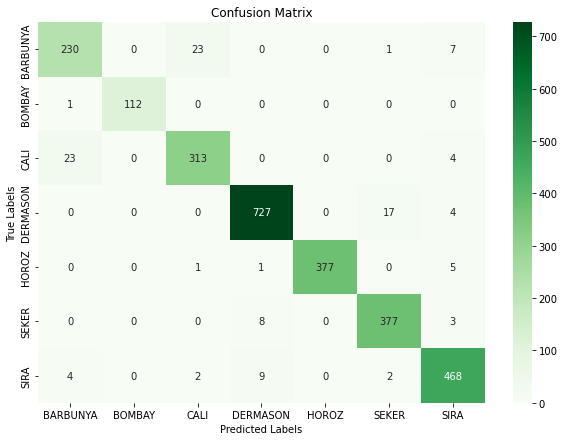

In [118]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=True, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# tree = mytree.visualize_tree()
# tree.render('Plots/Classification tree', format='png', cleanup=True)


(process:9536): GLib-GIO-WARNING **: 19:15:02.156: Unexpectedly, UWP app `38526MediaLife.ZipPlus_2.0.4.0_x86__1crh1k73ty8mg' (AUMId `38526MediaLife.ZipPlus_1crh1k73ty8mg!ZipExtractor') supports 89 extensions but has no verbs


'Plots\\Classification tree.png'

In [178]:
from myTree import Tuning

clf = Tuning()
depth_list = [8,9,10,11,12]
split_list = [2]
scores, means, weighted_f1_scores, mean_f1_weigthed_scores, f1_macro, f1_macro_mean, f1_micro, f1_micro_mean= clf.grid_search(X, y, depth_list, split_list, k=5)
clf.readable_scores(scores, depth_list, split_list)

Calculating Trees:   0%|                                                                         | 0/5 [15:06<?, ?it/s]

KeyboardInterrupt



In [ ]:
clf.readable_scores(means, depth_list, split_list)

In [ ]:
clf.readable_scores(weighted_f1_scores, depth_list, split_list)

In [ ]:
clf.readable_scores(mean_f1_weigthed_scores, depth_list, split_list)

In [ ]:
clf.readable_scores(f1_macro, depth_list, split_list)

In [ ]:
clf.readable_scores(f1_macro_mean, depth_list, split_list)

In [ ]:
clf.readable_scores(f1_micro, depth_list, split_list)

In [ ]:
clf.readable_scores(f1_micro_mean, depth_list, split_list)

In [169]:
import numpy as np
from scipy.stats import kruskal
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Perform the Kruskal-Wallis test
kruskal_result = kruskal(*scores)

# Print results
print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic}")
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue}")

if kruskal_result.pvalue < 0.05:
    print("There is a significant difference between the performance of different k values.")
else:
    print("No significant difference between the performance of different k values.")

Kruskal-Wallis H-statistic: 14.913712132630076
Kruskal-Wallis p-value: 0.7280655968650482
No significant difference between the performance of different k values.


In [167]:
from scipy.stats import f_oneway

# Perform ANOVA test
stat, p_value = f_oneway(*scores)

print(f"ANOVA statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("No statistically significant difference between the groups.")

ANOVA statistic: 0.914544709753302
P-value: 0.5671975663614353
No statistically significant difference between the groups.


In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_rel

for i in range(19):
    # Perform paired t-test
    stat, p_value = ttest_rel(scores[i], scores[i+1])

#     if p_value < 0.1:
    print(f"{i} {i+1}Paired t-test p-value: {p_value}")

0 1Paired t-test p-value: nan
1 2Paired t-test p-value: nan
2 3Paired t-test p-value: 0.17780780835622126
3 4Paired t-test p-value: 0.0961533574296851
4 5Paired t-test p-value: 0.20799999999998814
5 6Paired t-test p-value: 0.373900966300059
6 7Paired t-test p-value: 0.17780780835622126
7 8Paired t-test p-value: 0.9504295946484862
8 9Paired t-test p-value: 0.7040000000000521
9 10Paired t-test p-value: 0.18015182755781498
10 11Paired t-test p-value: 0.6548342365617601
11 12Paired t-test p-value: 0.8641515134165674
12 13Paired t-test p-value: 0.373900966300059
13 14Paired t-test p-value: 0.587049639787068
14 15Paired t-test p-value: 0.6135457051576056
15 16Paired t-test p-value: 0.9651789987517186
16 17Paired t-test p-value: 0.20799999999998814
17 18Paired t-test p-value: 0.875718143942998
18 19Paired t-test p-value: 0.11476192246456868


In [190]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mytree = ClassificationTree(max_depth=9, min_samples_split=2, random_state=42, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [191]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 323.9232460730725:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 180.70409671876598:
      3 Node: Split on 'Perimeter'
        If Perimeter == < 702.9345000000001:
        4 Node: Split on 'ConvexArea'
          If ConvexArea == < 32001.5:
          Leaf: Predict DERMASON
          If ConvexArea == >= 32001.5:
          5 Node: Split on 'AspectRation'
            If AspectRation == < 1.385705049955015:
            6 Node: Split on 'Area'
              If Area == < 32085.0:
              7 Node: Split on 'roundness'
                If roundness == < 0.921883782920106:
                Leaf: Predict DERMASON
                If roundness == >= 0.921883782920106:
                Leaf: Predict SEKER
              If Area == >= 32085.0:
              Leaf: Predict DERMASON
            If AspectRation == >= 1.385705049955015:
            Leaf: Predict

In [192]:
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
y_pred = mytree.predict(X_new_train)
(y_pred == y_new_train).sum() / len(y_new_train)

0.964367816091954

In [193]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9653333333333334

In [194]:
y_pred = mytree.predict(X_test)
y_pred

1065     DERMASON
3895        HOROZ
3577        HOROZ
7292     BARBUNYA
13141       SEKER
           ...   
12651    BARBUNYA
6565         CALI
11153    BARBUNYA
4351        SEKER
3222     DERMASON
Length: 2719, dtype: object

In [195]:
(y_test == y_pred).sum() / len(y_test)

0.9525560867966164

In [196]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    742
SIRA        503
SEKER       398
HOROZ       376
CALI        320
BARBUNYA    268
BOMBAY      112
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.89      0.87       261
      BOMBAY       1.00      0.99      1.00       113
        CALI       0.93      0.88      0.90       340
    DERMASON       0.98      0.97      0.98       748
       HOROZ       1.00      0.98      0.99       384
       SEKER       0.95      0.97      0.96       388
        SIRA       0.93      0.96      0.95       485

    accuracy                           0.95      2719
   macro avg       0.95      0.95      0.95      2719
weighted avg       0.95      0.95      0.95      2719



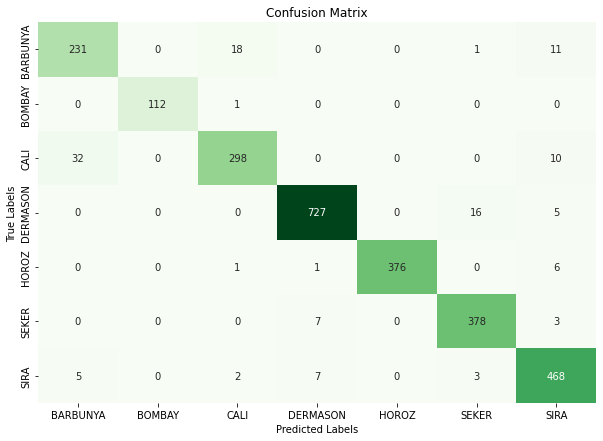

In [197]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("Plots/Classification tree confusion matrix")
plt.show()

In [198]:
tree = mytree.visualize_tree()
tree.render('Plots/New Classification tree', format='png', cleanup=True)

'Plots\\New Classification tree.png'

In [199]:
y.value_counts()

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64